In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### 1.	Reading the Dataset:

In [141]:
df = pd.read_csv('P1_Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [142]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

### EDA and data analysis

In [143]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [144]:
df.Exited.value_counts()


Exited
0    7963
1    2037
Name: count, dtype: int64

exited samples are much less than stayed

In [145]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [146]:
df.Geography.describe()

count      10000
unique         3
top       France
freq        5014
Name: Geography, dtype: object

In [147]:
df.Gender.describe()

count     10000
unique        2
top        Male
freq       5457
Name: Gender, dtype: object

In [148]:
df.drop(["Surname","CustomerId","RowNumber"], axis=1, inplace=True)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [150]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [151]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

## Step 2: Data Visualization
#### 1-numerical features:

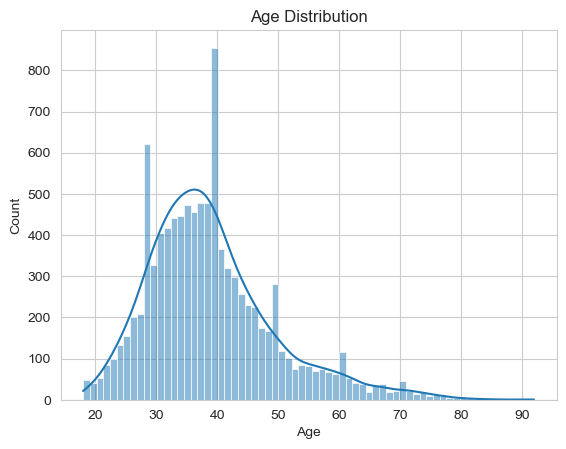

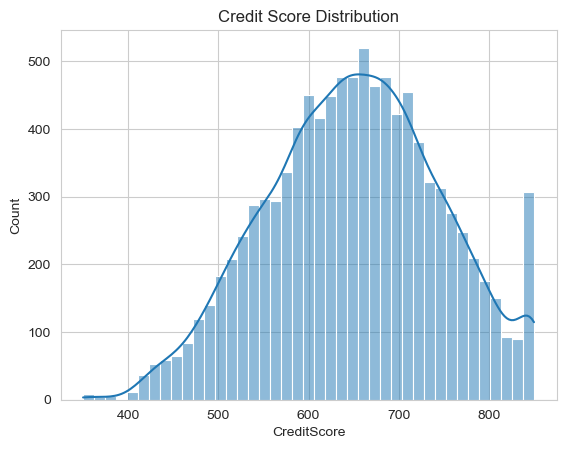

In [152]:
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

sns.histplot(df['CreditScore'], kde=True)
plt.title('Credit Score Distribution')
plt.show()

##### Age Distribution:
Skewed towards younger ages, with a peak around 30-40.
##### Credit Score Distribution:
Appears more normally distributed, centered around 600-700.


#### 2- Categorical features :

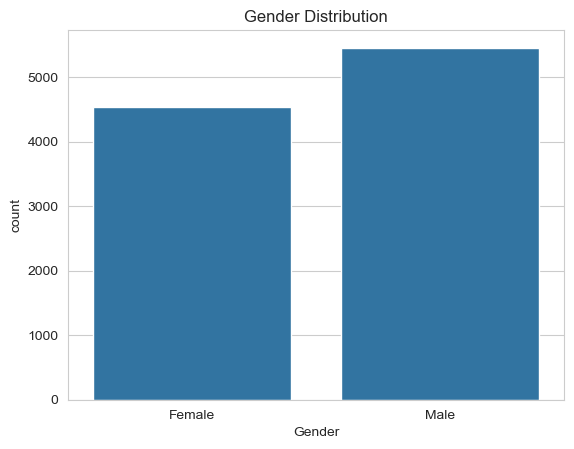

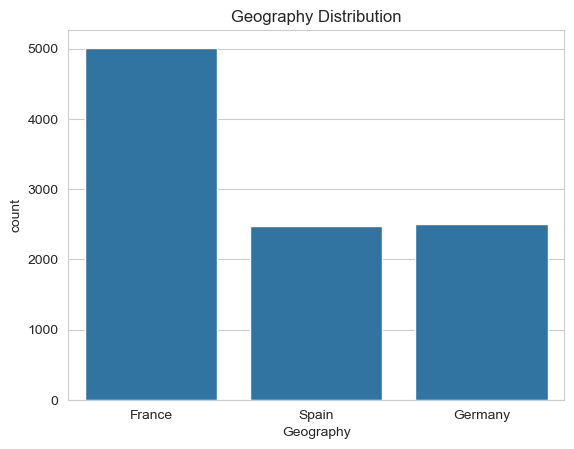

In [153]:
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

sns.countplot(x='Geography', data=df)
plt.title('Geography Distribution')
plt.show()

#### 3- Correlation Heatmap:

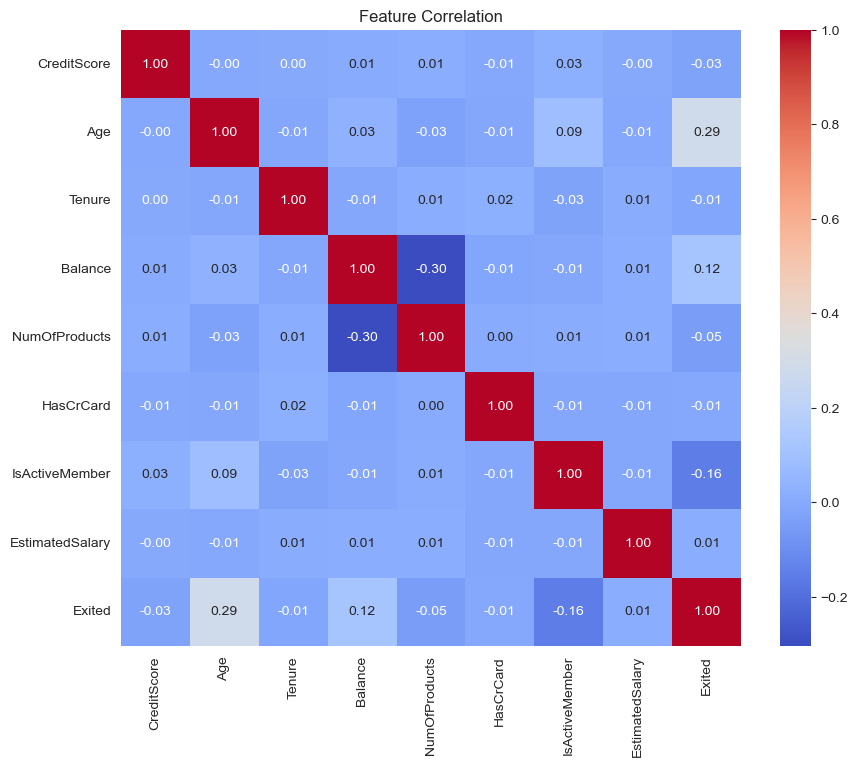

In [154]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation')
plt.show()

The correlation heatmap shows the relationships between numeric features:

- **Age and Exited**: A moderate positive correlation (0.29), suggesting older customers might be more likely to churn.
- **Balance and Exited**: A slight positive correlation (0.12), indicating a potential relationship.
- **IsActiveMember and Exited**: A negative correlation (-0.16), suggesting active members are less likely to churn.

### Actions to Consider:

- **Feature Importance**: Use these insights to prioritize features in your model.
- **Further Analysis**: Investigate features with higher correlations to understand their impact on churn.
- **Modeling**: Consider these correlations when selecting features for your predictive model.

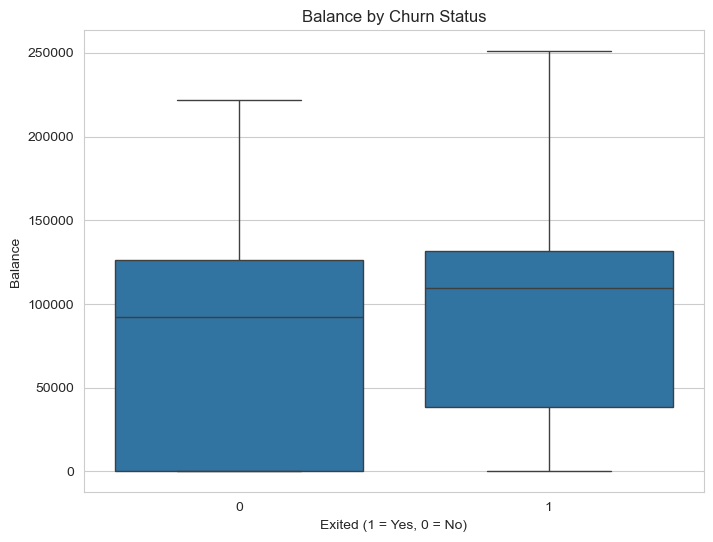

In [155]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title('Balance by Churn Status')
plt.xlabel('Exited (1 = Yes, 0 = No)')
plt.ylabel('Balance')
plt.show()

In [156]:
from scipy.stats import ttest_ind

# Separate the data into two groups
churned = df[df['Exited'] == 1]['Balance']
not_churned = df[df['Exited'] == 0]['Balance']

# Perform t-test
t_stat, p_value = ttest_ind(churned, not_churned)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 11.936240300013841
P-value: 1.2755633191525475e-32


#### balance and number if products are negatively correlated which mean that the more the balance without service is churn indicator

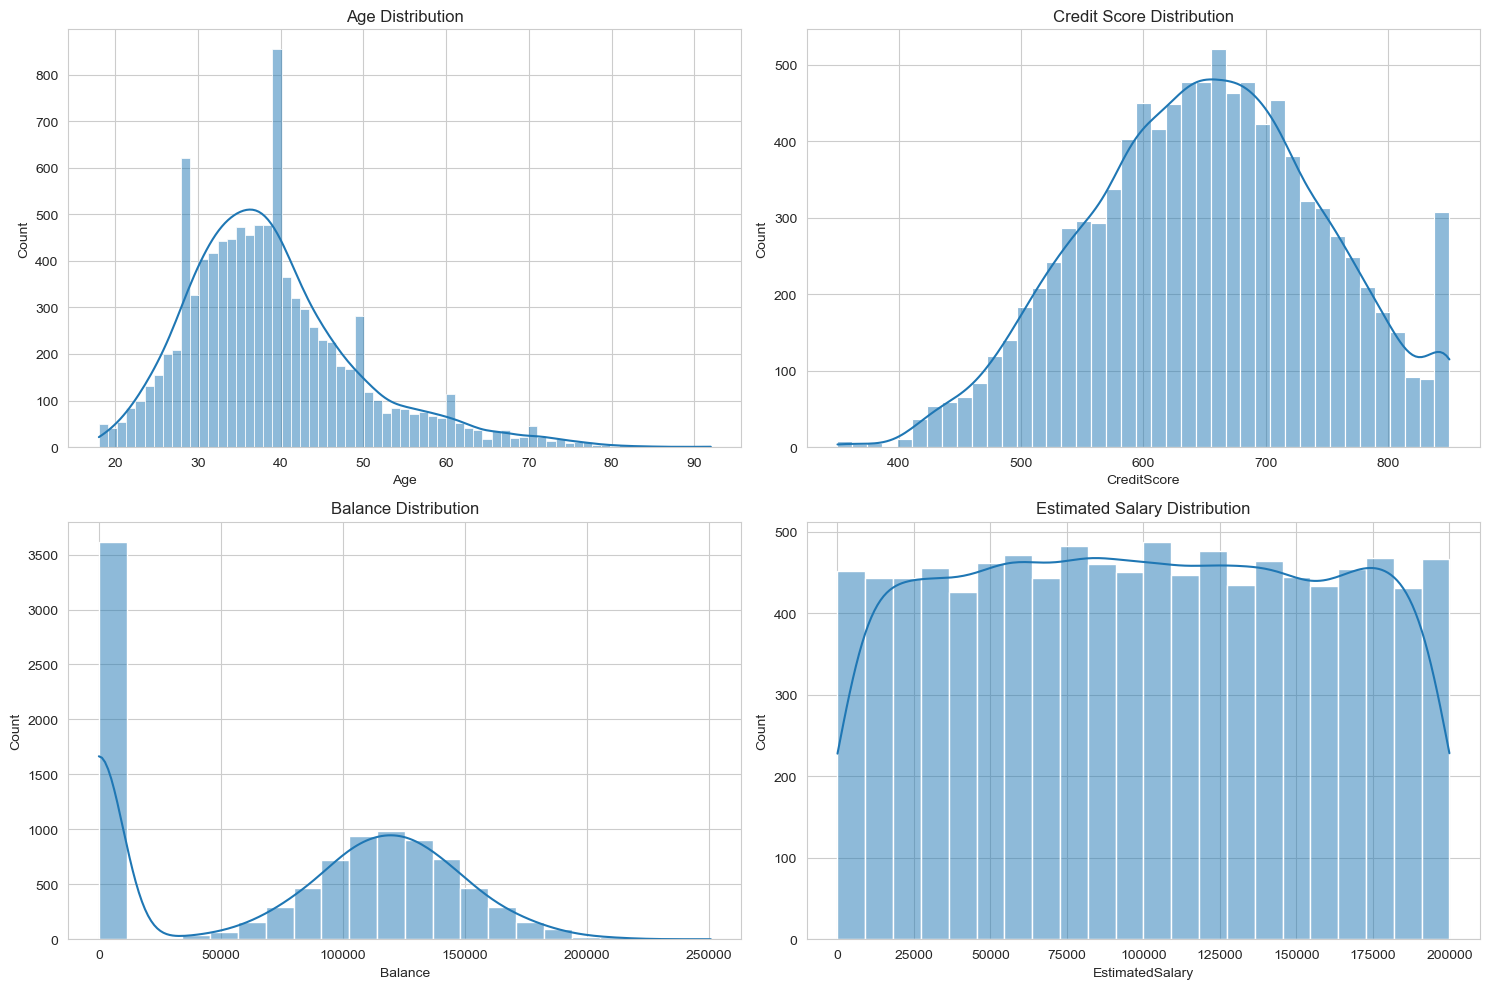

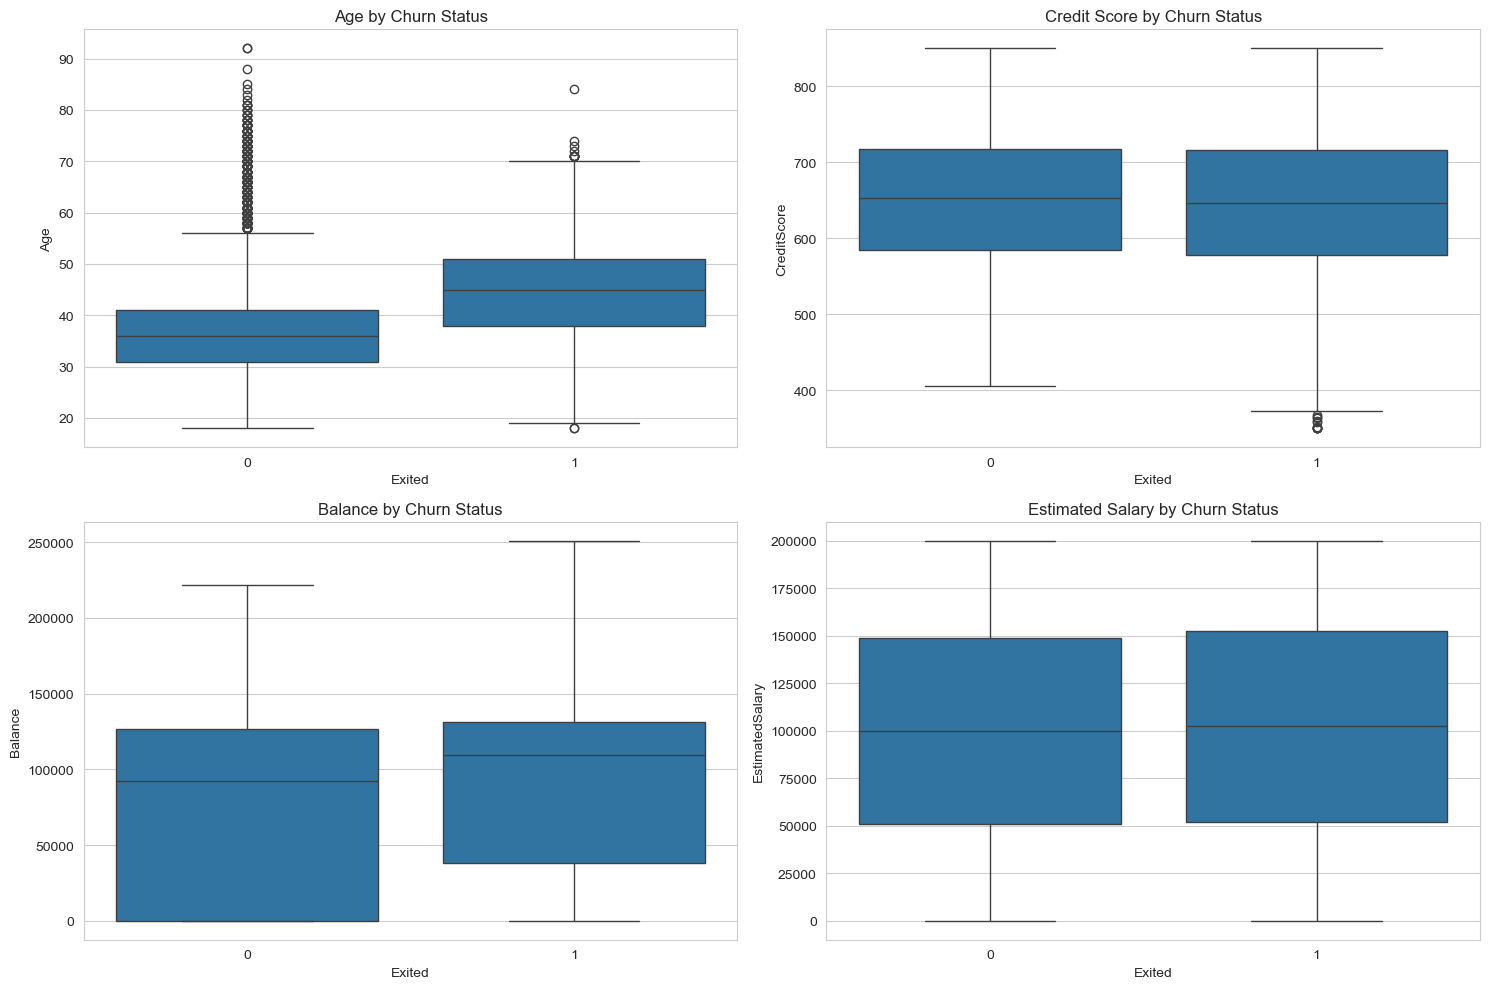

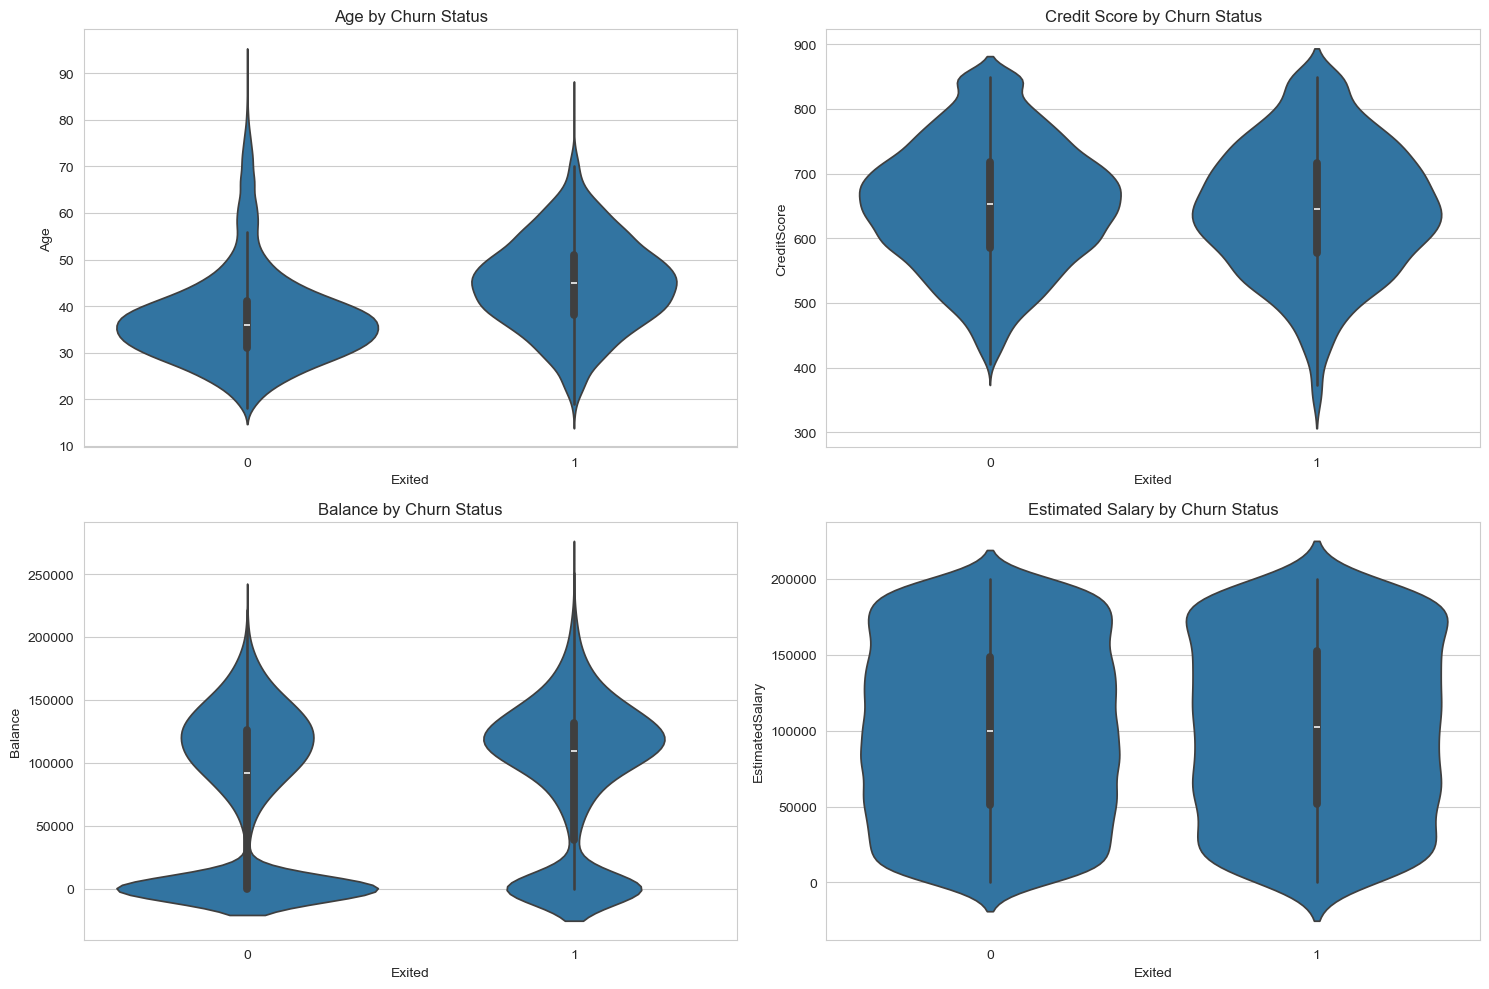

In [157]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(df['Age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')
sns.histplot(df['CreditScore'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Credit Score Distribution')
sns.histplot(df['Balance'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Balance Distribution')
sns.histplot(df['EstimatedSalary'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Estimated Salary Distribution')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(x='Exited', y='Age', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Age by Churn Status')
sns.boxplot(x='Exited', y='CreditScore', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Credit Score by Churn Status')
sns.boxplot(x='Exited', y='Balance', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Balance by Churn Status')
sns.boxplot(x='Exited', y='EstimatedSalary', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Estimated Salary by Churn Status')
plt.tight_layout()
plt.show()


fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.violinplot(x='Exited', y='Age', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Age by Churn Status')
sns.violinplot(x='Exited', y='CreditScore', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Credit Score by Churn Status')
sns.violinplot(x='Exited', y='Balance', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Balance by Churn Status')
sns.violinplot(x='Exited', y='EstimatedSalary', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Estimated Salary by Churn Status')
plt.tight_layout()
plt.show()

The violin plots provide a detailed view of the distribution of features by churn status. Here's what they reveal:

### Observations:

1. **Age by Churn Status**:
   - The distribution for churned customers (Exited = 1) shows a higher concentration of older ages compared to non-churned customers.
   - This suggests age might be a factor in predicting churn.

2. **Credit Score by Churn Status**:
   - The distributions are quite similar for both churned and non-churned customers.
   - Credit score alone may not be a strong predictor of churn.

3. **Balance by Churn Status**:
   - The distribution for churned customers shows a wider spread, with some having higher balances.
   - This could indicate that customers with higher balances might be more likely to churn, possibly due to dissatisfaction or unmet expectations.

4. **Estimated Salary by Churn Status**:
   - The distributions are very similar, indicating that estimated salary might not significantly impact churn.

### Insights and Actions:

- **Feature Importance**: Age and balance might be more important features for predicting churn. Consider focusing on these in your model.
- **Further Analysis**: Investigate interactions between features, such as age and balance, to uncover more complex relationships.
- **Modeling**: Use these insights to guide feature selection and engineering, potentially improving model accuracy.

These visualizations help in understanding the data's nuances and can guide your feature engineering and modeling efforts. If you have more questions or need further analysis, feel free to ask!

## Step 3: Feature Engineering
#### Encode Categorical Variables:

In [158]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [159]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[['Age', 'Balance', 'Tenure']])
poly_feature_names = poly.get_feature_names_out(['Age', 'Balance', 'Tenure'])
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)
df = pd.concat([df, poly_df], axis=1)

## Step 4: Data Preprocessing
#### Handle Class Imbalance:
Use SMOTE to balance the dataset.

In [160]:
from imblearn.over_sampling import SMOTE

X = df.drop(['Exited'], axis=1)
y = df['Exited']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

#### Feature Scaling:

Standardize numerical features.

In [161]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

## Step 5: Model Building and Evaluation
#### Train Multiple Models:




In [162]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

models = {
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),

}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Classification Report:\n", classification_report(y_test, y_pred))
    print(f"{name} ROC-AUC Score: ", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      1633
           1       0.82      0.84      0.83      1553

    accuracy                           0.83      3186
   macro avg       0.83      0.83      0.83      3186
weighted avg       0.83      0.83      0.83      3186

KNN ROC-AUC Score:  0.9030211955683821
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.76      0.76      1633
           1       0.75      0.75      0.75      1553

    accuracy                           0.76      3186
   macro avg       0.76      0.76      0.76      3186
weighted avg       0.76      0.76      0.76      3186

Naive Bayes ROC-AUC Score:  0.8362689364440514
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.89      1633
           1       0.90      0.85      0.88      1553

    



### KNN
- **Accuracy**: 83%
- **Precision/Recall/F1-Score**: Balanced and improved, indicating good performance.
- **ROC-AUC**: 0.90, showing strong class separation.

### Naive Bayes
- **Accuracy**: 76%
- **Precision/Recall/F1-Score**: Lower than other models, indicating room for improvement.
- **ROC-AUC**: 0.84, suggesting moderate performance.

### SVM
- **Accuracy**: 88%
- **Precision/Recall/F1-Score**: Highest among models, with excellent balance.
- **ROC-AUC**: 0.95, indicating outstanding class separation.

### Decision Tree
- **Accuracy**: 82%
- **Precision/Recall/F1-Score**: Good performance, but slightly lower than KNN and SVM.
- **ROC-AUC**: 0.82, indicating decent class separation.

### Conclusion
- **Best Model**: SVM, due to its highest accuracy and ROC-AUC score.
- **Considerations**: SVM offers the best performance but may require more computational resources.
